<a href="https://colab.research.google.com/github/uba-sagan/Spam_Detection/blob/Main/Spam_Detection_for_ENGLISH_Language.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SPAM DETECTION 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
%matplotlib inline

In [ ]:
cols = ["v1","v2"]
sms = pd.read_csv('spam.csv', encoding='latin-1',usecols=cols)
sms.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,"Ok yar... Joking , were r u only."
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
sms.tail()

,v1,v2
5574,ham,"This birthday, I wish you abundant happiness a..."
5575,ham,One year! You made it! Happy first wedding ann...
5576,ham,Making the Best of What's Around
5577,ham,"It's getting late for the party, be quick"
5578,ham,"Iam waiting near the mall , come quickly."


In [ ]:
sms = sms.rename(columns = {'v1':'label','v2':'message'})

In [ ]:
sms.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4831   4522                             Sorry, I'll call later   30
spam      748    656  Please call our customer service representativ...    4

In [ ]:
sms['length'] = sms['message'].apply(len)
sms.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,"Ok yar... Joking , were r u only.",34
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7cd79a7a90>,
      dtype=object)

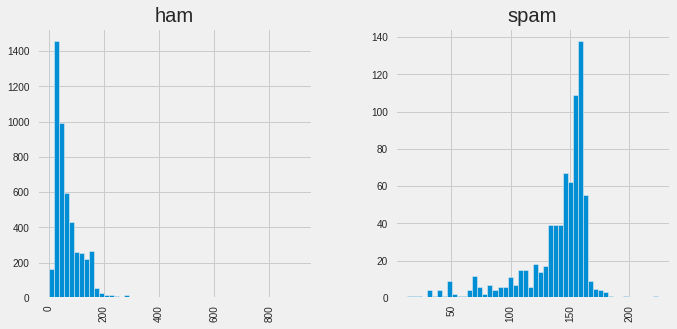

In [ ]:
mpl.rcParams['patch.force_edgecolor'] = True
plt.style.use('fivethirtyeight')
sms.hist(column='length', by='label', bins=50,figsize=(11,5))

Text processing and vectorizing our messages

In [ ]:
text_feat = sms['message'].copy()
print(text_feat)

0       Go until jurong point, crazy.. Available only ...
1                      Ok yar... Joking , were r  u only.
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5574    This birthday, I wish you abundant happiness a...
5575    One year! You made it! Happy first wedding ann...
5576                     Making the Best of What's Around
5577            It's getting late for the party, be quick
5578            Iam waiting near the mall , come quickly.
Name: message, Length: 5579, dtype: object


# ***Text precessing function: from nltk- stopwords ***

In [ ]:
def text_process(text):
    
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    
    return " ".join(text)

In [ ]:
import nltk
nltk.download('stopwords')

text_feat = text_feat.apply(text_process)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# **TFIDF - TERM FREQUENCY INVERSE DOCUMENT FREQUENCY **

In [ ]:
vectorizer = TfidfVectorizer("english")

In [ ]:
features = vectorizer.fit_transform(text_feat)
print(features)

  (0, 8877)	0.19699097929868728
  (0, 1169)	0.3454570796557584
  (0, 3824)	0.16231509561705115
  (0, 2199)	0.29185106999980037
  (0, 1863)	0.32977832692474257
  (0, 4814)	0.29185106999980037
  (0, 9113)	0.2382450603438423
  (0, 3864)	0.19193160005782117
  (0, 1865)	0.29185106999980037
  (0, 1402)	0.2627037982155197
  (0, 2483)	0.26754367698725645
  (0, 6386)	0.27021153212599774
  (0, 4657)	0.3454570796557584
  (0, 3767)	0.15708808129911306
  (1, 4625)	0.6923824734501838
  (1, 9257)	0.6236817723743181
  (1, 5951)	0.3628051229889604
  (2, 71)	0.2330198935478199
  (2, 1255)	0.16834289602143904
  (2, 6727)	0.2330198935478199
  (2, 8527)	0.12523564095886824
  (2, 6675)	0.2330198935478199
  (2, 6783)	0.16589442001819796
  (2, 865)	0.2190625879776817
  (2, 8159)	0.12255146879481217
  :	:
  (5575, 4071)	0.3713193904790589
  (5575, 8919)	0.33323518945807346
  (5575, 1198)	0.3425098045656659
  (5575, 5243)	0.46564297167173463
  (5575, 1548)	0.2756160176312873
  (5575, 2454)	0.2875730761240409
  

### **Classifiers & predictions**

# **SPLIT THE FEATURES TO TEST & TRAIN SET**

In [ ]:
features_train, features_test, labels_train, labels_test = train_test_split(features, sms['label'], test_size=0.3, random_state=111)

 Importing the bunch of classifiers,initialize them  & make a dictionary to itereate through Dict

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier(n_neighbors=49)
mnb = MultinomialNB(alpha=0.2)
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=111)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=31, random_state=111)
abc = AdaBoostClassifier(n_estimators=62, random_state=111)
bc = BaggingClassifier(n_estimators=9, random_state=111)
etc = ExtraTreesClassifier(n_estimators=9, random_state=111)

In [ ]:
clfs = {'SVC' : svc,'KN' : knc, 'NB': mnb, 'DT': dtc, 'LR': lrc, 'RF': rfc, 'AdaBoost': abc, 'BgC': bc, 'ETC': etc}

# **Creating functions to fit the classifiers and detection of Accuracy scores **

In [ ]:
def train_classifier(clf, feature_train, labels_train):    
    clf.fit(feature_train, labels_train)

In [ ]:
def predict_labels(clf, features):
    return (clf.predict(features))

Now iterate through classifiers and save the results

In [ ]:
pred_scores = []
for k,v in clfs.items():
    train_classifier(v, features_train, labels_train)
    pred = predict_labels(v,features_test)
    pred_scores.append((k, [accuracy_score(labels_test,pred)]))
pred_scores = dict(pred_scores)
print(pred_scores)

{'SVC': [0.9778972520908005], 'KN': [0.9175627240143369], 'NB': [0.9790919952210275], 'DT': [0.9522102747909199], 'LR': [0.9474313022700119], 'RF': [0.978494623655914], 'AdaBoost': [0.9695340501792115], 'BgC': [0.9671445639187575], 'ETC': [0.9743130227001194]}


In [ ]:
df =pd.DataFrame.from_dict(pred_scores,orient='index', columns=['Score'])
df

,Score
SVC,0.977897
KN,0.917563
NB,0.979092
DT,0.952210
LR,0.947431
RF,0.978495
AdaBoost,0.969534
BgC,0.967145
ETC,0.974313


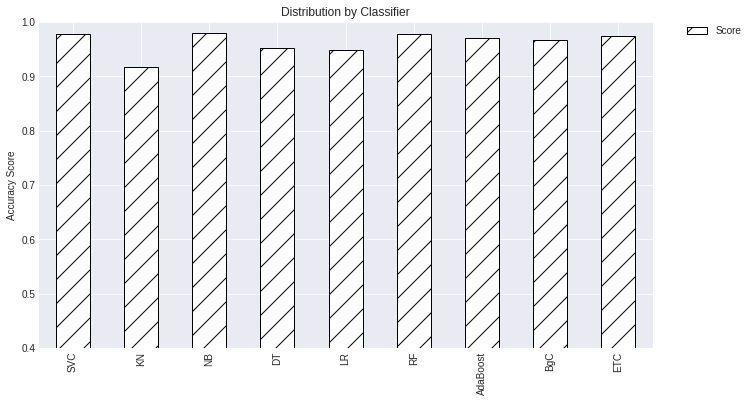

In [ ]:
df.plot(kind='bar', ylim=(0.4,1.0), figsize=(11,6), align='center', colormap="gist_stern_r",hatch = '/')
plt.xticks(np.arange(9), df.index)
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# **Snowball Stemmer**

In [ ]:
def stemmer (text):
    text = text.split()
    words = ""
    for i in text:
            stemmer = SnowballStemmer("english")
            words += (stemmer.stem(i))+" "
    return words

In [ ]:
text_feat = text_feat.apply(stemmer)

In [ ]:
features = vectorizer.fit_transform(text_feat)

In [ ]:
features_train, features_test, labels_train, labels_test = train_test_split(features, sms['label'], test_size=0.3, random_state=111)

In [ ]:
pred_scores = []
for k,v in clfs.items():
    train_classifier(v, features_train, labels_train)
    pred = predict_labels(v,features_test)
    pred_scores.append((k, [accuracy_score(labels_test,pred)]))
pred_scores=dict(pred_scores)
print(pred_scores)

{'SVC': [0.9778972520908005], 'KN': [0.9193548387096774], 'NB': [0.9778972520908005], 'DT': [0.9563918757467145], 'LR': [0.9528076463560334], 'RF': [0.97610513739546], 'AdaBoost': [0.9683393070489845], 'BgC': [0.961768219832736], 'ETC': [0.9695340501792115]}


In [ ]:
df2 = pd.DataFrame.from_dict(pred_scores,orient='index', columns=['Score2'])
df = pd.concat([df,df2],axis=1)
df

,Score,Score2
SVC,0.977897,0.977897
KN,0.917563,0.919355
NB,0.979092,0.977897
DT,0.952210,0.956392
LR,0.947431,0.952808
RF,0.978495,0.976105
AdaBoost,0.969534,0.968339
BgC,0.967145,0.961768
ETC,0.974313,0.969534


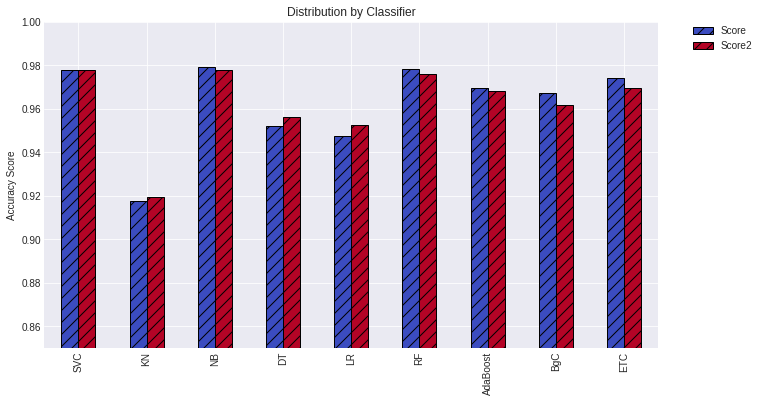

In [ ]:
df.plot(kind='bar', ylim=(0.85,1.0), figsize=(11,6), align='center', colormap="coolwarm", hatch='//')
plt.xticks(np.arange(9), df.index)
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)